In [1]:
import numpy as np
import matplotlib.pyplot as plt

# plt.rc
# plt.rcParams["font.family"] = "serif"
# plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
# parameters

k1 = 0.5
k2 = 1.5
k3 = 0.5
lr_WarmUpSteps1 = 8000
lr_WarmUpSteps2 = 15000
d_model = 512

# equations

steps = np.linspace(0.1, 200000, 1000)
head = steps**(-k1)

tail1 = steps * lr_WarmUpSteps1**(-k2)
lr1 = d_model**(-k3) * np.minimum(head, tail1)

tail2 = steps * lr_WarmUpSteps2**(-k2)
lr2 = d_model**(-k3) * np.minimum(head, tail2)

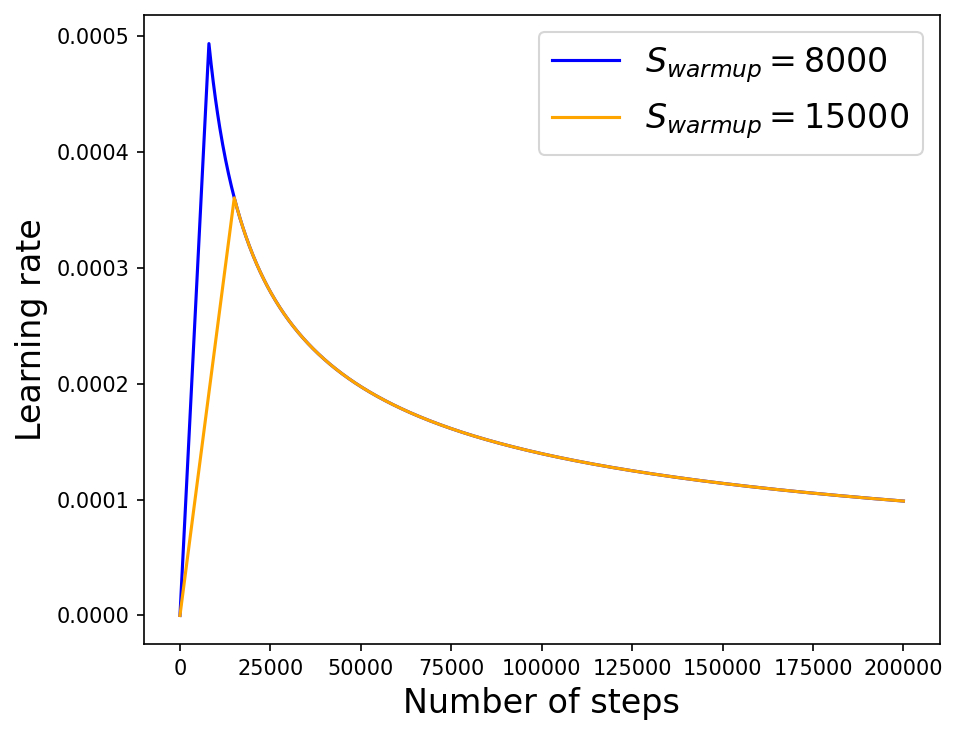

In [4]:
plt.figure(figsize=(6.5, 5.), dpi=150, facecolor=(1, 1, 1))

plt.plot(steps, lr1, color="blue", label=r'$S_{warmup}=8000$')
plt.plot(steps, lr2, color="orange", label=r'$S_{warmup}=15000$')
plt.xlabel('Number of steps', fontsize=16)
plt.ylabel('Learning rate', fontsize=16)
plt.legend(loc='upper right', fontsize=16)
plt.tight_layout()
plt.savefig('./lr.png')

In [14]:
# parameters

init_beta = 0.02
max_beta = 1
beg_epoch = 1
epochs = np.arange(0, 101)

inc_beta1 = 0.01
inc_beta2 = 0.02

# equations

beta_original1 = init_beta + inc_beta1 * (epochs+1-beg_epoch)
beta_original2 = init_beta + inc_beta2 * (epochs+1-beg_epoch)

def get_beta(beta_original):
    beta = np.empty((len(epochs),))
    for i, ep in enumerate(epochs):
        if ep + 1 >= beg_epoch and beta_original[i] < max_beta:
            beta[i] = beta_original[i]
        else:
            beta[i] = 1
    return beta

beta1 = get_beta(beta_original1)
beta2 = get_beta(beta_original2)

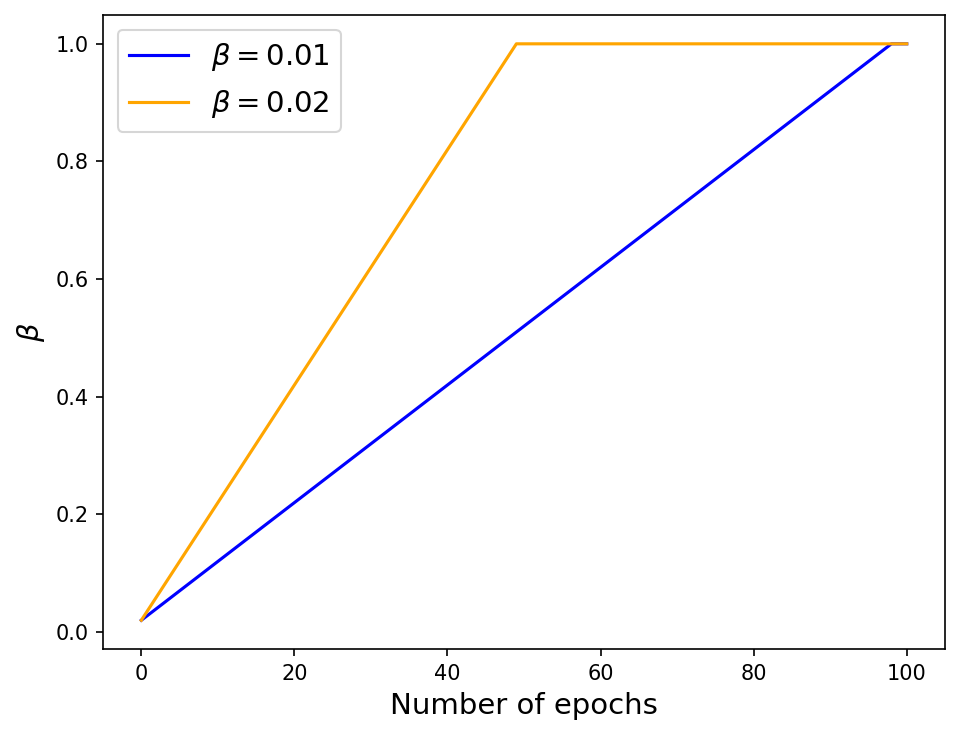

In [17]:
plt.figure(figsize=(6.5, 5.), dpi=150, facecolor=(1, 1, 1))

plt.plot(epochs, beta1, color="blue", label=r'$\beta=0.01$')
plt.plot(epochs, beta2, color="orange", label=r'$\beta=0.02$')
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel(r'$\beta$', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.savefig('./klannealing.png')